In [2]:
!pip install boto3

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 KB 303.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 660.3 kB/s eta 0:00:0000:0100:01
  Using cached jmespath-1.0.1-py3-none-any.whl (20 kB)
  Using cached s3transfer-0.10.1-py3-none-any.whl (82 kB)


In [3]:
import boto3
client = boto3.client('textract',region_name='',aws_access_key_id='',aws_secret_access_key='')
print(client)

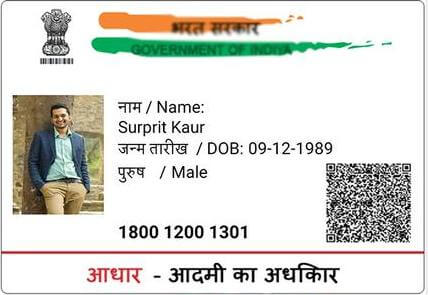

In [12]:
from PIL import Image

# Open the image
image = Image.open("/home/akansha/Job Assignments/onboarding_project/myproject/documents/aadharcard_dummy.jpg")

# Display the image
image


In [13]:
with open('/home/akansha/Job Assignments/onboarding_project/myproject/documents/aadharcard_dummy.jpg', 'rb') as image:
    img = bytearray(image.read())


response = client.detect_document_text(
    Document={'Bytes': img}
)
response

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 0.9705150127410889,
     'Height': 0.995033323764801,
     'Left': 0.029484963044524193,
     'Top': 0.0049666850827634335},
    'Polygon': [{'X': 0.03213813528418541, 'Y': 0.0049666850827634335},
     {'X': 1.0, 'Y': 0.0062372274696826935},
     {'X': 1.0, 'Y': 1.0},
     {'X': 0.029484963044524193, 'Y': 1.0}]},
   'Id': 'c0be7049-a9b3-43aa-832b-9b18e0daa17a',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['7296170a-a048-49b6-9c75-2d9f94635227',
      '8ce18907-b744-40fb-987d-1c6bce64bc78',
      'caa177b3-001d-4657-9c8d-16647c67e5ae',
      '16c59ec0-be78-40a1-bfd3-b231d4efb2f9',
      '97e4fa15-3bf3-436c-9913-dd7adbe94d5e',
      'a9bf2fd5-ccbe-4463-8e5b-cc163d4f663c',
      'c0153c97-505f-4f84-81a6-980a42250ecb',
      'b25c2323-b2a9-408c-a1be-2e914f9a93d4',
      'dd7750ee-8f11-4d44-95a5-42253a22cb7b']}]},
  {'BlockType': 'LINE',
   'Confidence': 50.77985382080078,
  

In [16]:
# response['Blocks'][0]
# response['Blocks'][1]
text = ""
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print (item["Text"])
        text = text + " "+item["Text"]


and
GOVERNMENT
-
714 / Name:
Surprit Kaur
J/H aRe / DOB: 09-12-1989
you / Male
1800 1200 1301
- HIGH TT


In [25]:
from datetime import datetime
import json

split_text = text.split('/')
data = {}

for item in split_text:
    pair = item.split(":")
    if len(pair) == 2:
        key = pair[0].strip()
        value = pair[1].strip()
        if key.lower() == "name":
            name_parts = value.split()[:2]
            value = ' '.join(name_parts)
        elif key.lower() == "dob":
            dob_str = value.split()[0]  # Extracting the date string
            dob = datetime.strptime(dob_str, '%d-%m-%Y')  # Converting to datetime object
            value = dob.strftime('%Y-%m-%d')  # Formatting to YYYY-MM-DD
        elif key.lower() == "you":
            if "male" in value.lower():
                gender = "Male"
            elif "female" in value.lower():
                gender = "Female"
            else:
                gender = "Unknown"
            data["Gender"] = gender
        data[key] = value

json_data = json.dumps(data)
print(json_data)

{"Name": "Surprit Kaur", "DOB": "1989-12-09", "Aadhar": "1234 5678 9012"}
